<a href="https://colab.research.google.com/github/chuchun2/ATMS597-Project6-GroupB/blob/master/ATMS597_Project6_GroupB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
%pylab inline
import xarray as xr
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss
from google.colab import drive
drive.mount('/content/drive')

Populating the interactive namespace from numpy and matplotlib
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sqrt', 'clf', 'mat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
# Set your directory path
YOUR_DIRECTORY = '/content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 6/Project 6/'  # Chu-Chun
# YOUR_DIRECTORY = '/content/drive/My Drive/Colab Notebooks/Project_6/' # Jeff

In [132]:
# Load saved combined data
SESA_MJOIndices_df = pd.read_csv(YOUR_DIRECTORY + 'SESA_Avg_Precip_MJOIndices_SoilMoisture.csv', index_col = 'Unnamed: 0')
SESA_MJOIndices_df.index = pd.to_datetime(SESA_MJOIndices_df.index)
SESA_MJOIndices_df

,SESA_Avg_GPCP_Precip,MJOPhase_OLR,MJOAmplitude_OLR,SESA_Avg_ERA5_Soil_Moisture_Lev1,SESA_Avg_ERA5_Soil_Moisture_Lev2,Year,Month,Day,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag30
1996-10-01,0.802094,4,0.4059,0.460888,0.468150,1996,10,1,6.0,6.0,5.0,5.0,5.0,1.0,0.6244,1.3798,1.0795,1.8319,0.5766,0.1080,0.492621,0.391118,0.432100,0.458614,0.449316,0.493759,0.491505,0.412240,0.429575,0.469598,0.461006,0.489766
1996-10-02,1.569398,3,0.4302,0.477875,0.478713,1996,10,2,5.0,6.0,5.0,5.0,5.0,5.0,0.0353,1.0692,1.2913,2.1190,0.8674,0.0653,0.492292,0.384300,0.450946,0.447974,0.438204,0.472939,0.491294,0.407437,0.442633,0.460626,0.451942,0.476704
1996-10-03,17.859299,2,0.4495,0.491203,0.490375,1996,10,3,4.0,6.0,5.0,5.0,5.0,5.0,0.2783,0.9147,1.2725,2.2432,1.2157,0.2746,0.496148,0.425672,0.435107,0.436272,0.501194,0.490613,0.493880,0.413252,0.438342,0.451673,0.478370,0.476392
1996-10-04,20.841913,2,0.3561,0.476827,0.483787,1996,10,4,4.0,6.0,5.0,5.0,5.0,5.0,0.6957,0.8338,1.3071,1.8349,1.4513,0.2632,0.484567,0.457851,0.419107,0.425025,0.483698,0.478728,0.485176,0.418785,0.430604,0.442405,0.491913,0.484252
1996-10-05,15.586549,1,0.5695,0.464411,0.472448,1996,10,5,4.0,6.0,5.0,5.0,5.0,5.0,0.6552,0.9839,1.4173,1.3773,1.6767,0.3715,0.473772,0.490829,0.406261,0.414356,0.468232,0.462643,0.479636,0.480346,0.422279,0.433058,0.478959,0.471617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,0.000000,2,0.3398,0.342145,0.373197,2019,11,26,1.0,8.0,7.0,5.0,4.0,3.0,1.0919,1.3378,1.9191,2.5294,1.8076,1.0424,0.352499,0.450357,0.462952,0.460949,0.427921,0.391507,0.389813,0.461422,0.458716,0.453349,0.428227,0.411377
2019-11-27,0.000000,1,0.6084,0.493269,0.444673,2019,11,27,2.0,8.0,7.0,5.0,5.0,3.0,0.9114,1.4613,1.9520,2.6146,1.9560,0.9014,0.339058,0.427612,0.444662,0.472428,0.409340,0.439617,0.380560,0.446058,0.448385,0.455172,0.420137,0.433978
2019-11-28,0.951774,1,0.7808,0.470274,0.462430,2019,11,28,3.0,8.0,8.0,6.0,5.0,4.0,0.6524,1.7816,1.9104,2.2046,2.2855,1.0290,0.361567,0.405825,0.427252,0.466658,0.422816,0.420148,0.381075,0.430731,0.439063,0.458762,0.421203,0.428518
2019-11-29,2.152993,1,0.9184,0.444326,0.449410,2019,11,29,3.0,8.0,8.0,6.0,5.0,4.0,0.5886,1.3550,1.6640,2.1225,2.4898,0.9807,0.362398,0.385543,0.494899,0.456993,0.447623,0.413893,0.379400,0.415153,0.481285,0.451284,0.431803,0.425161


In [133]:
# Add labels for extreme precipitation
SESA_MJOIndices_df['std_anoms'] = (SESA_MJOIndices_df['SESA_Avg_GPCP_Precip'] - mean(SESA_MJOIndices_df['SESA_Avg_GPCP_Precip'], axis=0)) / std(SESA_MJOIndices_df['SESA_Avg_GPCP_Precip'], axis=0)
SESA_MJOIndices_df['Extremes'] = (SESA_MJOIndices_df['std_anoms'].values > 0.75).astype('int')
SESA_MJOIndices_df

,SESA_Avg_GPCP_Precip,MJOPhase_OLR,MJOAmplitude_OLR,SESA_Avg_ERA5_Soil_Moisture_Lev1,SESA_Avg_ERA5_Soil_Moisture_Lev2,Year,Month,Day,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag30,std_anoms,Extremes
1996-10-01,0.802094,4,0.4059,0.460888,0.468150,1996,10,1,6.0,6.0,5.0,5.0,5.0,1.0,0.6244,1.3798,1.0795,1.8319,0.5766,0.1080,0.492621,0.391118,0.432100,0.458614,0.449316,0.493759,0.491505,0.412240,0.429575,0.469598,0.461006,0.489766,-0.485266,0
1996-10-02,1.569398,3,0.4302,0.477875,0.478713,1996,10,2,5.0,6.0,5.0,5.0,5.0,5.0,0.0353,1.0692,1.2913,2.1190,0.8674,0.0653,0.492292,0.384300,0.450946,0.447974,0.438204,0.472939,0.491294,0.407437,0.442633,0.460626,0.451942,0.476704,-0.402769,0
1996-10-03,17.859299,2,0.4495,0.491203,0.490375,1996,10,3,4.0,6.0,5.0,5.0,5.0,5.0,0.2783,0.9147,1.2725,2.2432,1.2157,0.2746,0.496148,0.425672,0.435107,0.436272,0.501194,0.490613,0.493880,0.413252,0.438342,0.451673,0.478370,0.476392,1.348650,1
1996-10-04,20.841913,2,0.3561,0.476827,0.483787,1996,10,4,4.0,6.0,5.0,5.0,5.0,5.0,0.6957,0.8338,1.3071,1.8349,1.4513,0.2632,0.484567,0.457851,0.419107,0.425025,0.483698,0.478728,0.485176,0.418785,0.430604,0.442405,0.491913,0.484252,1.669328,1
1996-10-05,15.586549,1,0.5695,0.464411,0.472448,1996,10,5,4.0,6.0,5.0,5.0,5.0,5.0,0.6552,0.9839,1.4173,1.3773,1.6767,0.3715,0.473772,0.490829,0.406261,0.414356,0.468232,0.462643,0.479636,0.480346,0.422279,0.433058,0.478959,0.471617,1.104294,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,0.000000,2,0.3398,0.342145,0.373197,2019,11,26,1.0,8.0,7.0,5.0,4.0,3.0,1.0919,1.3378,1.9191,2.5294,1.8076,1.0424,0.352499,0.450357,0.462952,0.460949,0.427921,0.391507,0.389813,0.461422,0.458716,0.453349,0.428227,0.411377,-0.571504,0
2019-11-27,0.000000,1,0.6084,0.493269,0.444673,2019,11,27,2.0,8.0,7.0,5.0,5.0,3.0,0.9114,1.4613,1.9520,2.6146,1.9560,0.9014,0.339058,0.427612,0.444662,0.472428,0.409340,0.439617,0.380560,0.446058,0.448385,0.455172,0.420137,0.433978,-0.571504,0
2019-11-28,0.951774,1,0.7808,0.470274,0.462430,2019,11,28,3.0,8.0,8.0,6.0,5.0,4.0,0.6524,1.7816,1.9104,2.2046,2.2855,1.0290,0.361567,0.405825,0.427252,0.466658,0.422816,0.420148,0.381075,0.430731,0.439063,0.458762,0.421203,0.428518,-0.469173,0
2019-11-29,2.152993,1,0.9184,0.444326,0.449410,2019,11,29,3.0,8.0,8.0,6.0,5.0,4.0,0.5886,1.3550,1.6640,2.1225,2.4898,0.9807,0.362398,0.385543,0.494899,0.456993,0.447623,0.413893,0.379400,0.415153,0.481285,0.451284,0.431803,0.425161,-0.340024,0


# Logistic Regression Model

# (1) linear regression (all variables)

In [134]:
# select the data
data = SESA_MJOIndices_df.drop(columns = ['SESA_Avg_GPCP_Precip', 'std_anoms'])  # all variables
# data = data.drop(columns = [word for word in SESA_MJOIndices_df.columns if re.search('.Soil_Moisture.', word)])  # only MJO
# data = data.drop(columns = [word for word in SESA_MJOIndices_df.columns if re.search('MJO.', word)])  # only soil moisture
data

,MJOPhase_OLR,MJOAmplitude_OLR,SESA_Avg_ERA5_Soil_Moisture_Lev1,SESA_Avg_ERA5_Soil_Moisture_Lev2,Year,Month,Day,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag30,Extremes
1996-10-01,4,0.4059,0.460888,0.468150,1996,10,1,6.0,6.0,5.0,5.0,5.0,1.0,0.6244,1.3798,1.0795,1.8319,0.5766,0.1080,0.492621,0.391118,0.432100,0.458614,0.449316,0.493759,0.491505,0.412240,0.429575,0.469598,0.461006,0.489766,0
1996-10-02,3,0.4302,0.477875,0.478713,1996,10,2,5.0,6.0,5.0,5.0,5.0,5.0,0.0353,1.0692,1.2913,2.1190,0.8674,0.0653,0.492292,0.384300,0.450946,0.447974,0.438204,0.472939,0.491294,0.407437,0.442633,0.460626,0.451942,0.476704,0
1996-10-03,2,0.4495,0.491203,0.490375,1996,10,3,4.0,6.0,5.0,5.0,5.0,5.0,0.2783,0.9147,1.2725,2.2432,1.2157,0.2746,0.496148,0.425672,0.435107,0.436272,0.501194,0.490613,0.493880,0.413252,0.438342,0.451673,0.478370,0.476392,1
1996-10-04,2,0.3561,0.476827,0.483787,1996,10,4,4.0,6.0,5.0,5.0,5.0,5.0,0.6957,0.8338,1.3071,1.8349,1.4513,0.2632,0.484567,0.457851,0.419107,0.425025,0.483698,0.478728,0.485176,0.418785,0.430604,0.442405,0.491913,0.484252,1
1996-10-05,1,0.5695,0.464411,0.472448,1996,10,5,4.0,6.0,5.0,5.0,5.0,5.0,0.6552,0.9839,1.4173,1.3773,1.6767,0.3715,0.473772,0.490829,0.406261,0.414356,0.468232,0.462643,0.479636,0.480346,0.422279,0.433058,0.478959,0.471617,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,2,0.3398,0.342145,0.373197,2019,11,26,1.0,8.0,7.0,5.0,4.0,3.0,1.0919,1.3378,1.9191,2.5294,1.8076,1.0424,0.352499,0.450357,0.462952,0.460949,0.427921,0.391507,0.389813,0.461422,0.458716,0.453349,0.428227,0.411377,0
2019-11-27,1,0.6084,0.493269,0.444673,2019,11,27,2.0,8.0,7.0,5.0,5.0,3.0,0.9114,1.4613,1.9520,2.6146,1.9560,0.9014,0.339058,0.427612,0.444662,0.472428,0.409340,0.439617,0.380560,0.446058,0.448385,0.455172,0.420137,0.433978,0
2019-11-28,1,0.7808,0.470274,0.462430,2019,11,28,3.0,8.0,8.0,6.0,5.0,4.0,0.6524,1.7816,1.9104,2.2046,2.2855,1.0290,0.361567,0.405825,0.427252,0.466658,0.422816,0.420148,0.381075,0.430731,0.439063,0.458762,0.421203,0.428518,0
2019-11-29,1,0.9184,0.444326,0.449410,2019,11,29,3.0,8.0,8.0,6.0,5.0,4.0,0.5886,1.3550,1.6640,2.1225,2.4898,0.9807,0.362398,0.385543,0.494899,0.456993,0.447623,0.413893,0.379400,0.415153,0.481285,0.451284,0.431803,0.425161,0


In [0]:
# Separate labels
labels = data['Extremes'].to_numpy()
features = data.drop(columns = ['Extremes']).to_numpy()
features_norm = (features - mean(features, axis=0)) / std(features, axis=0)

In [0]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_norm, labels, test_size = 0.3, random_state = 42)

In [137]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (5917, 31)
Training Labels Shape: (5917,)
Testing Features Shape: (2537, 31)
Testing Labels Shape: (2537,)


In [138]:
# Train the model
clf = LogisticRegression(max_iter=10e10, random_state=42)
clf.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000000000.0,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

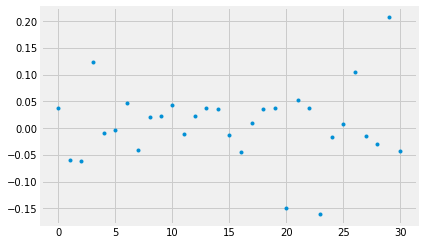

In [139]:
plt.plot(clf.coef_[0], '.')

In [0]:
# Probabilities for logistic regression
train_prob = clf.predict_proba(train_features)
test_prob = clf.predict_proba(test_features)

In [0]:
# Climatological probability
def get_climo(labels, shape):
    climo = (np.size((labels == 1).nonzero()))/float(np.size(labels))
    prob  = np.zeros((shape))
    prob[:,0] = 1-climo
    prob[:,1] = climo
    return prob

In [0]:
# Calculate climatological probability for training and testing data
train_climo_prob = get_climo(train_labels, train_prob.shape)
test_climo_prob = get_climo(test_labels, test_prob.shape)

In [0]:
# Calculate the Brier Skill Score
train_bss = 1 - (brier_score_loss(train_labels, train_prob[:,1])/brier_score_loss(train_labels, train_climo_prob[:,1]))
test_bss = 1 - (brier_score_loss(test_labels, test_prob[:,1])/brier_score_loss(test_labels, test_climo_prob[:,1]))

In [144]:
# Bier skill score
print('Training Brier Skill Score: ' + str(train_bss))
print('Testing Brier Skill Score: ' + str(test_bss))

Training Brier Skill Score: 0.004148532534291038
Testing Brier Skill Score: 8.95740922385313e-05


In [145]:
# Bier score
print('Training Brier score: ' + str(brier_score_loss(train_labels, clf.predict(train_features))))
print('Testing Brier score: ' + str(brier_score_loss(test_labels, clf.predict(test_features))))

Training Brier score: 0.1519351022477607
Testing Brier score: 0.15648403626330312


In [0]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_labels, clf.predict(test_features))

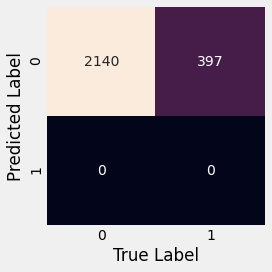

In [147]:
# Plot matrix
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
mpl.style.use('fivethirtyeight')

labels_str = ['0', '1']
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels_str, yticklabels=labels_str)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.tight_layout()

# (2) linear regression (all variables, Oct to Mar)

In [148]:
# select the data
data = SESA_MJOIndices_df.drop(columns = ['SESA_Avg_GPCP_Precip', 'std_anoms'])  # all variables
# data = data.drop(columns = [word for word in SESA_MJOIndices_df.columns if re.search('.Soil_Moisture.', word)])  # only MJO
# data = data.drop(columns = [word for word in SESA_MJOIndices_df.columns if re.search('MJO.', word)])  # only soil moisture
data

,MJOPhase_OLR,MJOAmplitude_OLR,SESA_Avg_ERA5_Soil_Moisture_Lev1,SESA_Avg_ERA5_Soil_Moisture_Lev2,Year,Month,Day,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag30,Extremes
1996-10-01,4,0.4059,0.460888,0.468150,1996,10,1,6.0,6.0,5.0,5.0,5.0,1.0,0.6244,1.3798,1.0795,1.8319,0.5766,0.1080,0.492621,0.391118,0.432100,0.458614,0.449316,0.493759,0.491505,0.412240,0.429575,0.469598,0.461006,0.489766,0
1996-10-02,3,0.4302,0.477875,0.478713,1996,10,2,5.0,6.0,5.0,5.0,5.0,5.0,0.0353,1.0692,1.2913,2.1190,0.8674,0.0653,0.492292,0.384300,0.450946,0.447974,0.438204,0.472939,0.491294,0.407437,0.442633,0.460626,0.451942,0.476704,0
1996-10-03,2,0.4495,0.491203,0.490375,1996,10,3,4.0,6.0,5.0,5.0,5.0,5.0,0.2783,0.9147,1.2725,2.2432,1.2157,0.2746,0.496148,0.425672,0.435107,0.436272,0.501194,0.490613,0.493880,0.413252,0.438342,0.451673,0.478370,0.476392,1
1996-10-04,2,0.3561,0.476827,0.483787,1996,10,4,4.0,6.0,5.0,5.0,5.0,5.0,0.6957,0.8338,1.3071,1.8349,1.4513,0.2632,0.484567,0.457851,0.419107,0.425025,0.483698,0.478728,0.485176,0.418785,0.430604,0.442405,0.491913,0.484252,1
1996-10-05,1,0.5695,0.464411,0.472448,1996,10,5,4.0,6.0,5.0,5.0,5.0,5.0,0.6552,0.9839,1.4173,1.3773,1.6767,0.3715,0.473772,0.490829,0.406261,0.414356,0.468232,0.462643,0.479636,0.480346,0.422279,0.433058,0.478959,0.471617,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,2,0.3398,0.342145,0.373197,2019,11,26,1.0,8.0,7.0,5.0,4.0,3.0,1.0919,1.3378,1.9191,2.5294,1.8076,1.0424,0.352499,0.450357,0.462952,0.460949,0.427921,0.391507,0.389813,0.461422,0.458716,0.453349,0.428227,0.411377,0
2019-11-27,1,0.6084,0.493269,0.444673,2019,11,27,2.0,8.0,7.0,5.0,5.0,3.0,0.9114,1.4613,1.9520,2.6146,1.9560,0.9014,0.339058,0.427612,0.444662,0.472428,0.409340,0.439617,0.380560,0.446058,0.448385,0.455172,0.420137,0.433978,0
2019-11-28,1,0.7808,0.470274,0.462430,2019,11,28,3.0,8.0,8.0,6.0,5.0,4.0,0.6524,1.7816,1.9104,2.2046,2.2855,1.0290,0.361567,0.405825,0.427252,0.466658,0.422816,0.420148,0.381075,0.430731,0.439063,0.458762,0.421203,0.428518,0
2019-11-29,1,0.9184,0.444326,0.449410,2019,11,29,3.0,8.0,8.0,6.0,5.0,4.0,0.5886,1.3550,1.6640,2.1225,2.4898,0.9807,0.362398,0.385543,0.494899,0.456993,0.447623,0.413893,0.379400,0.415153,0.481285,0.451284,0.431803,0.425161,0


In [149]:
# Select only Oct-Mar
data = data[~data.index.month.isin([4, 5, 6, 7, 8, 9])]
data

,MJOPhase_OLR,MJOAmplitude_OLR,SESA_Avg_ERA5_Soil_Moisture_Lev1,SESA_Avg_ERA5_Soil_Moisture_Lev2,Year,Month,Day,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag30,Extremes
1996-10-01,4,0.4059,0.460888,0.468150,1996,10,1,6.0,6.0,5.0,5.0,5.0,1.0,0.6244,1.3798,1.0795,1.8319,0.5766,0.1080,0.492621,0.391118,0.432100,0.458614,0.449316,0.493759,0.491505,0.412240,0.429575,0.469598,0.461006,0.489766,0
1996-10-02,3,0.4302,0.477875,0.478713,1996,10,2,5.0,6.0,5.0,5.0,5.0,5.0,0.0353,1.0692,1.2913,2.1190,0.8674,0.0653,0.492292,0.384300,0.450946,0.447974,0.438204,0.472939,0.491294,0.407437,0.442633,0.460626,0.451942,0.476704,0
1996-10-03,2,0.4495,0.491203,0.490375,1996,10,3,4.0,6.0,5.0,5.0,5.0,5.0,0.2783,0.9147,1.2725,2.2432,1.2157,0.2746,0.496148,0.425672,0.435107,0.436272,0.501194,0.490613,0.493880,0.413252,0.438342,0.451673,0.478370,0.476392,1
1996-10-04,2,0.3561,0.476827,0.483787,1996,10,4,4.0,6.0,5.0,5.0,5.0,5.0,0.6957,0.8338,1.3071,1.8349,1.4513,0.2632,0.484567,0.457851,0.419107,0.425025,0.483698,0.478728,0.485176,0.418785,0.430604,0.442405,0.491913,0.484252,1
1996-10-05,1,0.5695,0.464411,0.472448,1996,10,5,4.0,6.0,5.0,5.0,5.0,5.0,0.6552,0.9839,1.4173,1.3773,1.6767,0.3715,0.473772,0.490829,0.406261,0.414356,0.468232,0.462643,0.479636,0.480346,0.422279,0.433058,0.478959,0.471617,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,2,0.3398,0.342145,0.373197,2019,11,26,1.0,8.0,7.0,5.0,4.0,3.0,1.0919,1.3378,1.9191,2.5294,1.8076,1.0424,0.352499,0.450357,0.462952,0.460949,0.427921,0.391507,0.389813,0.461422,0.458716,0.453349,0.428227,0.411377,0
2019-11-27,1,0.6084,0.493269,0.444673,2019,11,27,2.0,8.0,7.0,5.0,5.0,3.0,0.9114,1.4613,1.9520,2.6146,1.9560,0.9014,0.339058,0.427612,0.444662,0.472428,0.409340,0.439617,0.380560,0.446058,0.448385,0.455172,0.420137,0.433978,0
2019-11-28,1,0.7808,0.470274,0.462430,2019,11,28,3.0,8.0,8.0,6.0,5.0,4.0,0.6524,1.7816,1.9104,2.2046,2.2855,1.0290,0.361567,0.405825,0.427252,0.466658,0.422816,0.420148,0.381075,0.430731,0.439063,0.458762,0.421203,0.428518,0
2019-11-29,1,0.9184,0.444326,0.449410,2019,11,29,3.0,8.0,8.0,6.0,5.0,4.0,0.5886,1.3550,1.6640,2.1225,2.4898,0.9807,0.362398,0.385543,0.494899,0.456993,0.447623,0.413893,0.379400,0.415153,0.481285,0.451284,0.431803,0.425161,0


Training Features Shape: (2972, 31)
Training Labels Shape: (2972,)
Testing Features Shape: (1274, 31)
Testing Labels Shape: (1274,)


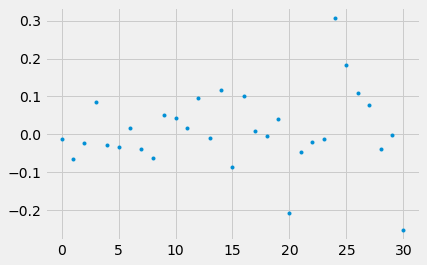

In [150]:
# Separate labels
labels = data['Extremes'].to_numpy()
features = data.drop(columns = ['Extremes']).to_numpy()
features_norm = (features - mean(features, axis=0)) / std(features, axis=0)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_norm, labels, test_size = 0.3, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Train the model
clf = LogisticRegression(max_iter=10e10, random_state=42)
clf.fit(train_features, train_labels)

plt.plot(clf.coef_[0], '.')

In [151]:
# Probabilities for logistic regression
train_prob = clf.predict_proba(train_features)
test_prob = clf.predict_proba(test_features)

# Calculate climatological probability for training and testing data
train_climo_prob = get_climo(train_labels, train_prob.shape)
test_climo_prob = get_climo(test_labels, test_prob.shape)

# Calculate the Brier Skill Score
train_bss = 1 - (brier_score_loss(train_labels, train_prob[:,1])/brier_score_loss(train_labels, train_climo_prob[:,1]))
test_bss = 1 - (brier_score_loss(test_labels, test_prob[:,1])/brier_score_loss(test_labels, test_climo_prob[:,1]))

# Bier skill score
print('Training Brier Skill Score: ' + str(train_bss))
print('Testing Brier Skill Score: ' + str(test_bss))

# Bier score
print('Training Brier score: ' + str(brier_score_loss(train_labels, clf.predict(train_features))))
print('Testing Brier score: ' + str(brier_score_loss(test_labels, clf.predict(test_features))))

Training Brier Skill Score: 0.014831016947174924
Testing Brier Skill Score: -0.01029177551271987
Training Brier score: 0.15578734858681023
Testing Brier score: 0.16483516483516483


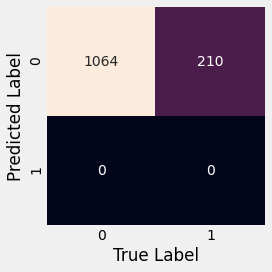

In [152]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_labels, clf.predict(test_features))

# Plot matrix
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
mpl.style.use('fivethirtyeight')

labels_str = ['0', '1']
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels_str, yticklabels=labels_str)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.tight_layout()